### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import pickle

In [2]:
import warnings

warnings.filterwarnings('ignore')

### Reading The Dataset

In [3]:
df = pd.read_csv('C:\\Users\\prasa\\VsCode\\Campus Placement Predictor Webapp Using ML\\archive\\collegePlace.csv')

###  The Shape Of Data

In [4]:
df.shape

(2966, 8)

In [5]:
print('Number Of Rows : ',df.shape[0])
print('Number Of Columns : ',df.shape[1])

Number Of Rows :  2966
Number Of Columns :  8


### The First 5 Rows Of Dataset

In [6]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


### The Last 5 Rows Of Dataset

In [7]:
df.tail()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0
2965,23,Male,Civil,0,8,0,0,1


### 5 Rows Of The Dataset At Random

In [8]:
df.sample(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
166,21,Male,Electrical,0,5,0,0,0
2498,21,Male,Computer Science,0,7,0,1,0
317,22,Male,Electrical,1,8,0,0,1
552,21,Male,Information Technology,1,7,0,1,0
1994,21,Male,Mechanical,0,8,1,0,1


### The Datatype Of Columns That Are In The Dataset

In [9]:
df.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

### The Detailed Information Of The Features In Dataset 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [11]:
df.isnull()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2961,False,False,False,False,False,False,False,False
2962,False,False,False,False,False,False,False,False
2963,False,False,False,False,False,False,False,False
2964,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

### Overall Statistics About The Dataset

In [13]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


### Exploratory Data Analysis (EDA)

In [14]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [15]:
df['Age'].unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29], dtype=int64)

In [16]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [18]:
df['Internships'].unique()

array([1, 0, 2, 3], dtype=int64)

In [19]:
df['CGPA'].unique()

array([8, 7, 6, 9, 5], dtype=int64)

In [20]:
df['Hostel'].unique()

array([1, 0], dtype=int64)

In [21]:
df['HistoryOfBacklogs'].unique()

array([1, 0], dtype=int64)

In [22]:
df['PlacedOrNot'].unique()

array([1, 0], dtype=int64)

### How Many Students Got Placed ?

In [23]:
df['PlacedOrNot'].value_counts()

1    1639
0    1327
Name: PlacedOrNot, dtype: int64

In [24]:
print("The Number Of Students Placed : ", df['PlacedOrNot'].value_counts()[1])
print("The Number Of Students Not Placed : ", df['PlacedOrNot'].value_counts()[0])

The Number Of Students Placed :  1639
The Number Of Students Not Placed :  1327


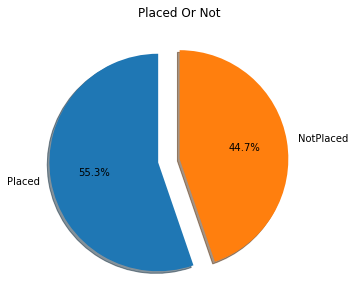

In [25]:
plt.figure(figsize = (10,5))
plt.pie(df['PlacedOrNot'].value_counts(), labels =['Placed','NotPlaced'], autopct = '%.1f%%',explode = [0.2 , 0] , shadow = True ,startangle = 90 )
plt.title("Placed Or Not")
plt.show()

### Maximum And Minimum Age Of Placed Person

In [26]:
Max = df[(df['Age'] == df['Age'].max()) & (df['PlacedOrNot'] == 1)]['Age'].values[0]
print("Max Age Of Placed Person : ", Max)

Min = df[(df['Age'] == df['Age'].min()) & (df['PlacedOrNot'] == 0)]['Age'].values[0]
print("Min Age Of Placed Person : ", Min)

Max Age Of Placed Person :  30
Min Age Of Placed Person :  19


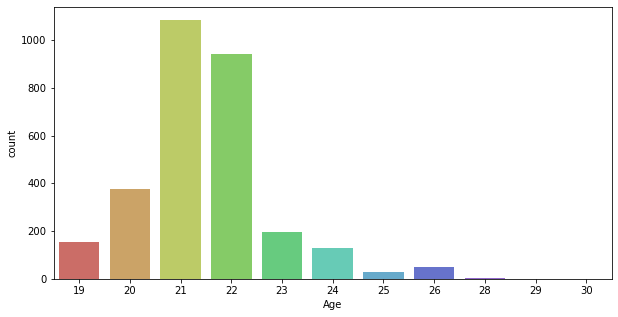

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age', data = df, palette = 'hls') 
plt.show()

### Male Students Who Got Placed 

In [28]:
M = df[df['Gender'] == 'Male']['Gender'].count()

print("Total Number Of Male Student : ",M)

Total Number Of Male Student :  2475


In [29]:
M_P = df[(df['Gender'] == 'Male') & (df['PlacedOrNot'] == 1)]['PlacedOrNot'].count()

print("Total Number Of Male Student Who Got Placed : ",M_P)
print("Number Of Male Student Who Are Not Placed : ", M - M_P)

Total Number Of Male Student Who Got Placed :  1364
Number Of Male Student Who Are Not Placed :  1111


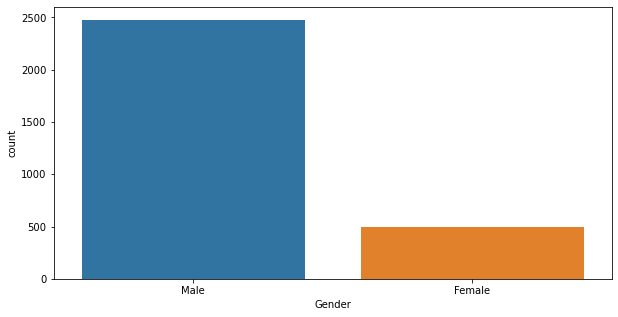

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(x='Gender', data=df)
plt.show()

### Female Students Who Got Placed

In [31]:
F = df[df['Gender'] == 'Female']['Gender'].count()

print("Total Number Of Female Student : ",F)

Total Number Of Female Student :  491


In [32]:
M_F = df[(df['Gender'] == 'Female') & (df['PlacedOrNot'] == 1)]['PlacedOrNot'].count()

print("Total Number Of Female Student Who Got Placed : ",M_F)
print("Number Of Female Student Who Are Not Placed : ", F - M_F)

Total Number Of Female Student Who Got Placed :  275
Number Of Female Student Who Are Not Placed :  216


### Data Regarding Students In Various Streams

In [33]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

#### 1.Data Regarding Electronics And Communication Student

In [34]:
ec = df[df['Stream'] == 'Electronics And Communication'].shape[0]

print("Total Number Of Students In Electronics And Communication : ", ec)

Total Number Of Students In Electronics And Communication :  424


In [35]:
placed = df[(df['Stream'] == 'Electronics And Communication') & (df['PlacedOrNot'] == 1)].shape[0]

print("Electronics And Communication Students Who Got Placement : " , placed)

Electronics And Communication Students Who Got Placement :  251


In [36]:
n_placed = df[(df['Stream'] == 'Electronics And Communication') & (df['PlacedOrNot'] == 0)].shape[0]

print("Electronics And Communication Students Who Are Not Placed : " , n_placed)

Electronics And Communication Students Who Are Not Placed :  173


#### 2.Data Regarding Computer Science Student

In [37]:
cs = df[df['Stream'] == 'Computer Science'].shape[0]

print("Total Number Of Students In Computer Science : ", cs)

Total Number Of Students In Computer Science :  776


In [38]:
placed = df[(df['Stream'] == 'Computer Science') & (df['PlacedOrNot'] == 1)].shape[0]

print("Computer Science Students Who Got Placement : " , placed)

Computer Science Students Who Got Placement :  452


In [39]:
n_placed = df[(df['Stream'] == 'Computer Science') & (df['PlacedOrNot'] == 0)].shape[0]

print("Computer Science Students Who Are Not Placed : " , n_placed)

Computer Science Students Who Are Not Placed :  324


#### 3.Data Regarding Information Technology Student

In [40]:
it = df[df['Stream'] == 'Information Technology'].shape[0]

print("Total Number Of Students In Information Technology : ",it)

Total Number Of Students In Information Technology :  691


In [41]:
placed = df[(df['Stream'] == 'Information Technology') & (df['PlacedOrNot'] == 1)].shape[0]

print("Information Technology Students Who Got Placement : " , placed)

Information Technology Students Who Got Placement :  409


In [42]:
n_placed = df[(df['Stream'] == 'Information Technology') & (df['PlacedOrNot'] == 0)].shape[0]

print("Information Technology Students Who Are Not Placed : " , n_placed)

Information Technology Students Who Are Not Placed :  282


#### 4.Data Regarding Mechanical Student

In [43]:
mc = df[df['Stream'] == 'Mechanical'].shape[0]

print("Total Number Of Students In Mechanical : ",mc)

Total Number Of Students In Mechanical :  424


In [44]:
placed = df[(df['Stream'] == 'Mechanical') & (df['PlacedOrNot'] == 1)].shape[0]

print("Mechanical Students Who Got Placement : " , placed)

Mechanical Students Who Got Placement :  200


In [45]:
n_placed = df[(df['Stream'] == 'Mechanical') & (df['PlacedOrNot'] == 0)].shape[0]

print("Mechanical Students Who Are Not Placed : " , n_placed)

Mechanical Students Who Are Not Placed :  224


#### 5.Data Regarding Electrical Student

In [46]:
el = df[df['Stream'] == 'Electrical'].shape[0]

print("Total Number Of Students In Electrical : ",el)

Total Number Of Students In Electrical :  334


In [47]:
placed = df[(df['Stream'] == 'Electrical') & (df['PlacedOrNot'] == 1)].shape[0]

print("Electrical Students Who Got Placement : " , placed)

Electrical Students Who Got Placement :  181


In [48]:
n_placed = df[(df['Stream'] == 'Electrical') & (df['PlacedOrNot'] == 0)].shape[0]

print("Electrical Students Who Are Not Placed : " , n_placed)

Electrical Students Who Are Not Placed :  153


#### 6.Data Regarding Civil Student

In [49]:
cv = df[df['Stream'] == 'Civil'].shape[0]

print("Total Number Of Students In Civil : ",cv)

Total Number Of Students In Civil :  317


In [50]:
placed = df[(df['Stream'] == 'Civil') & (df['PlacedOrNot'] == 1)].shape[0]

print("Civil Students Who Got Placement : " , placed)

Civil Students Who Got Placement :  146


In [51]:
n_placed = df[(df['Stream'] == 'Civil') & (df['PlacedOrNot'] == 0)].shape[0]

print("Civil Students Who Are Not Placed : " , n_placed)

Civil Students Who Are Not Placed :  171


In [52]:
cv + ec + it + el + cs + mc

2966

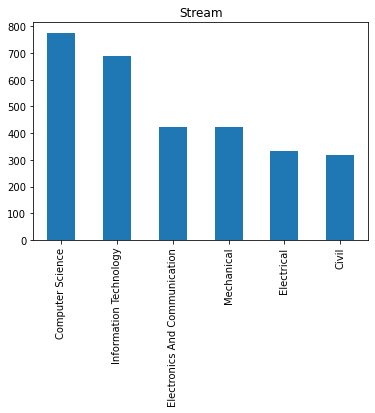

<Figure size 720x360 with 0 Axes>

In [53]:
fig = df ['Stream'].value_counts().plot.bar()
plt.figure(figsize = (10,5))
fig.set_title('Stream')
plt.show()

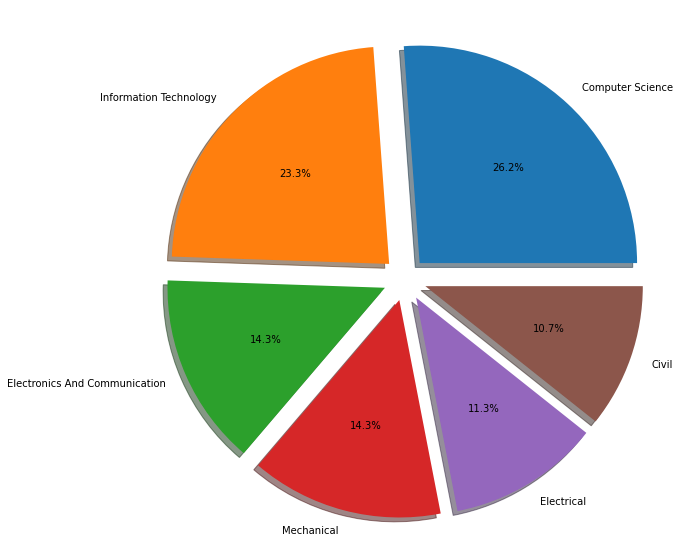

In [54]:
plt.figure(figsize = (10,10))
plt.pie(df['Stream'].value_counts(), labels = df['Stream'].value_counts().index, autopct = '%.1f%%', explode = [0.1,0.1,0.1,0.1,0.1,0.1] , shadow = True)
plt.show()

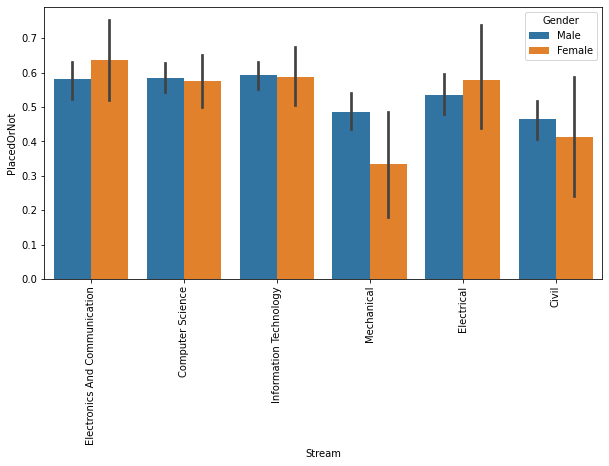

In [55]:
plt.figure(figsize = (10,5))
sns.barplot(data=df, x="Stream", y="PlacedOrNot",hue ="Gender").set_xticklabels(labels = df['Stream'].unique(),rotation = 90)
plt.show()

### Maximum And Minimum Internships Done By Placed Student

In [56]:
Max_In = df[(df['Internships'] == df['Internships'].max()) 
          & (df['PlacedOrNot'] == 1)]['Internships'].values[0]

print("Max Internships Done By The Placed Student : ", Max_In)

Max_In_Pl = df[(df['Internships'] == df['Internships'].max()) 
             & (df['PlacedOrNot'] == 1)]['Internships'].value_counts().values[0]

print("No. Of Student Who Did Max Internships And Are Placed : " , Max_In_Pl)

Max Internships Done By The Placed Student :  3
No. Of Student Who Did Max Internships And Are Placed :  41


In [57]:
Min_In = df[(df['Internships'] == df['Internships'].min()) 
          & (df['PlacedOrNot'] == 1)]['Internships'].values[0]

print("Min Internships Done By The Placed Student : ", Min_In)

Min_In_Pl = df[(df['Internships'] == df['Internships'].min()) 
             & (df['PlacedOrNot'] == 1)]['Internships'].value_counts().values[0]

print("No. Of Student Who Did Min Internships And Are Placed : " , Min_In_Pl)

Min Internships Done By The Placed Student :  0
No. Of Student Who Did Min Internships And Are Placed :  654


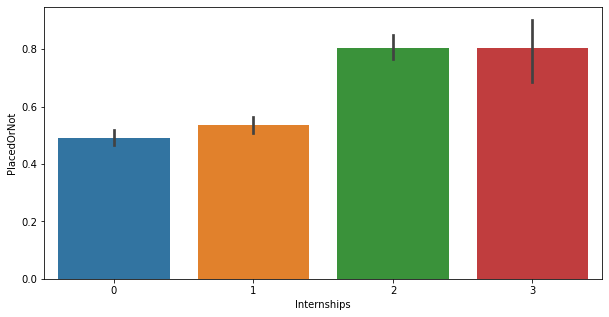

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.Internships, y = df.PlacedOrNot) 
plt.show()

### Maximum And Minimum CGPA Obtained By Placed Student

In [59]:
Max_C = df[(df['CGPA'] == df['CGPA'].max()) 
          & (df['PlacedOrNot'] == 1)]['CGPA'].values[0]

print("Max CGPA Obtained By The Placed Student : ", Max_C)

Max_C_Pl = df[(df['CGPA'] == df['CGPA'].max()) 
             & (df['PlacedOrNot'] == 1)]['CGPA'].value_counts().values[0]

print("No. Of Student Who Has Max CGPA And Are Placed : " , Max_C_Pl)

Max CGPA Obtained By The Placed Student :  9
No. Of Student Who Has Max CGPA And Are Placed :  165


In [60]:
Min_C = df[(df['CGPA'] == df['CGPA'].min()) 
          & (df['PlacedOrNot'] == 1)]['CGPA'].values[0]

print("Min CGPA Obtained By The Placed Student : ", Min_C)

Min_C_Pl = df[(df['CGPA'] == df['CGPA'].min()) 
             & (df['PlacedOrNot'] == 1)]['CGPA'].value_counts().values[0]

print("No. Of Student Who Has Min CGPA And Are Placed : " , Min_C_Pl)

Min CGPA Obtained By The Placed Student :  5
No. Of Student Who Has Min CGPA And Are Placed :  7


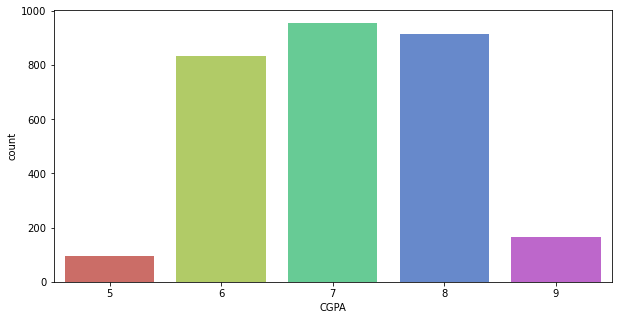

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x='CGPA', data = df, palette = 'hls') 
plt.show()

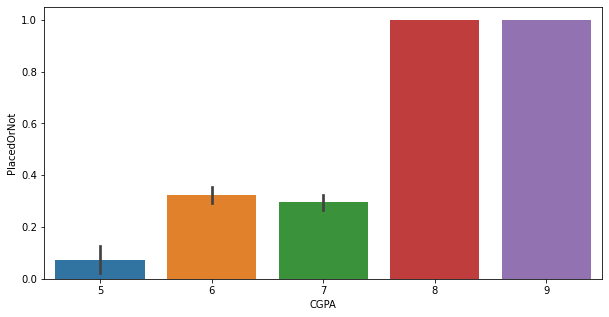

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.CGPA, y = df.PlacedOrNot) 
plt.show()

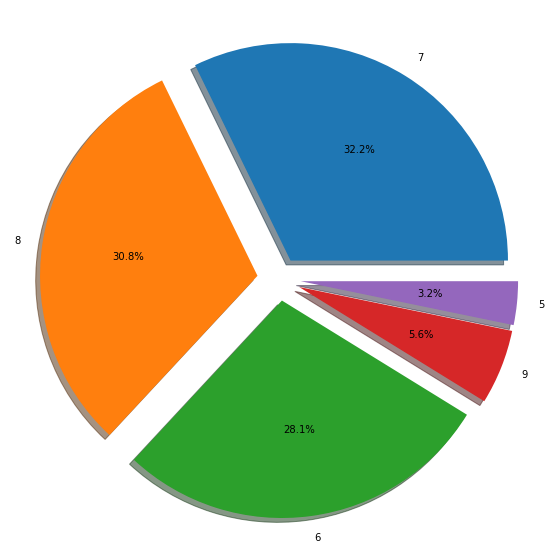

In [63]:
plt.figure(figsize = (10,10))
plt.pie(df['CGPA'].value_counts(),labels = df['CGPA'].value_counts().index,autopct = '%.1f%%',explode =[0.1,0.1,0.1,0.1,0.1],shadow = True)
plt.show()

### Number Of Student Who Live In Hostel And Got Placed

In [64]:
H = df[df['Hostel'] == 1].shape[0]

print("Number Of Student Who Live In Hostel : ", H)
print("Number Of Student Who Don't Live In Hostel" , df[df['Hostel'] == 0].shape[0])

Number Of Student Who Live In Hostel :  798
Number Of Student Who Don't Live In Hostel 2168


In [65]:
H_P = df[(df['Hostel'] == 1) & df['PlacedOrNot'] == 1].shape[0]

print("Number Of Student Who Live In Hostel And Got Placed : ", H_P)

Number Of Student Who Live In Hostel And Got Placed :  416


In [66]:
H_NP = df[(df['Hostel'] == 1) & (df['PlacedOrNot'] == 0)].shape[0]

print("Number Of Student Who Live In Hostel And Not Placed : ", H_NP)

Number Of Student Who Live In Hostel And Not Placed :  382


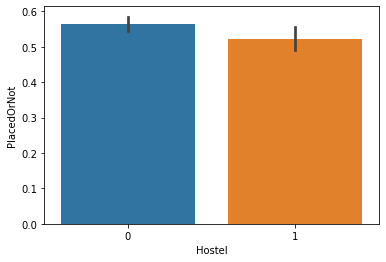

In [67]:
sns.barplot(x = df.Hostel, y = df.PlacedOrNot) 
plt.show()

### Number Of Student Who Don't Live In Hostel And Got Placed

In [68]:
NH = df[df['Hostel'] == 0].shape[0]

print("Number Of Students Who Don't Live In Hostel : ",NH)

Number Of Students Who Don't Live In Hostel :  2168


In [69]:
NH_P = df[(df['Hostel'] == 0) & (df['PlacedOrNot'] == 1)].shape[0]

print("Number Of Student Who Don't Live In Hostel And Got Placed : ",NH_P)

Number Of Student Who Don't Live In Hostel And Got Placed :  1223


In [70]:
NH_NP = df[(df['Hostel'] == 0) & (df['PlacedOrNot'] == 0)].shape[0]

print("Number Of Student Who Don't Live In Hostel And Not Placed : ",NH_NP)

Number Of Student Who Don't Live In Hostel And Not Placed :  945


### Number Of Student Who Had History Of Backlogs And Still Got Placed

In [71]:
B = df[df['HistoryOfBacklogs'] == 1].shape[0]

print("Number Of Students Who Had Backlogs : ", B)
print("Number Of Students Who Had No Backlogs : ", df[df['HistoryOfBacklogs'] == 0].shape[0])

Number Of Students Who Had Backlogs :  570
Number Of Students Who Had No Backlogs :  2396


In [72]:
B_P = df[(df['HistoryOfBacklogs'] == 1) & (df['PlacedOrNot'] == 1)].shape[0]

print("Number Of Students Who Had Backlogs And Got Placed : ",B_P)

Number Of Students Who Had Backlogs And Got Placed :  302


In [73]:
B_NP = df[(df['HistoryOfBacklogs'] == 1) & (df['PlacedOrNot'] == 0)].shape[0]

print("Number Of Students Who Had Backlogs And Didn't Get Placed : ",B_NP)

Number Of Students Who Had Backlogs And Didn't Get Placed :  268


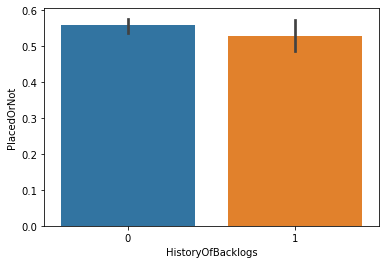

In [74]:
sns.barplot(x = df.HistoryOfBacklogs, y = df.PlacedOrNot) 
plt.show()

### Number Of Student Who Didn't Had History Of  Backlogs And Got Placed

In [75]:
NB = df[df['HistoryOfBacklogs'] == 0].shape[0]

print("Number Of Student Who Had No Backlogs : ",NB)

Number Of Student Who Had No Backlogs :  2396


In [76]:
NB_P = df[(df['HistoryOfBacklogs'] == 0) & (df['PlacedOrNot'] == 1)].shape[0]

print("Number Of Student Who Had No Backlogs And Got Placed : ",NB_P)

Number Of Student Who Had No Backlogs And Got Placed :  1337


In [77]:
NB_NP = df[(df['HistoryOfBacklogs'] == 0) & (df['PlacedOrNot'] == 0)].shape[0]

print("Number Of Student Who Had No Backlogs And Not Placed : ",NB_NP)

Number Of Student Who Had No Backlogs And Not Placed :  1059


# <span style = "color:Brown;"><h1>Observations</h1></span>

<hr>

##  <span style = "color:green;">The Number Of Students Placed :  1639</span>
## <span style = "color:red;">The Number Of Students Not Placed :  1327</span>
<hr>

## `Max Age Of Placed Person : 30`
## `Min Age Of Placed Person : 19`

<hr>

## `Total Number Of Male Student` :  <span style = "color:green;">2475</span>
### <span style = "color:blue;">Total Number Of Male Student Who Got Placed :  1364</span>
### <span style = "color:red;">Number Of Male Student Who Are Not Placed :  1111</span>
<hr>

## `Total Number Of Female Student` :  <span style = "color:green;">491</span>
### <span style = "color:blue;">Total Number Of Female Student Who Got Placed :  275</span>
### <span style = "color:red;">Number Of Female Student Who Are Not Placed :  216</span>
<hr>

## `Total Number Of Students In Electronics And Communication ` :  <span style = "color:green;">424</span>
### <span style = "color:blue;">Electronics And Communication Students Who Got Placement :  251</span>
### <span style = "color:red;">Electronics And Communication Students Who Are Not Placed : 173</span>
<hr>

## `Total Number Of Students In Computer Science `  :  <span style = "color:green;">776</span>
### <span style = "color:blue;">Computer Science Students Who Got Placement :  452</span>
### <span style = "color:red;">Computer Science Students Who Are Not Placed :  324</span>
<hr>

## `Total Number Of Students In Information Technology` :  <span style = "color:green;">691</span>
### <span style = "color:blue;">Information Technology Students Who Got Placement :  409</span>
### <span style = "color:red;">Information Technology Students Who Are Not Placed :  282</span>
<hr>

## `Total Number Of Students In Mechanical` :  <span style = "color:green;">424</span>
### <span style = "color:blue;">Mechanical Students Who Got Placement :  200</span>
### <span style = "color:red;">Mechanical Students Who Are Not Placed :  224</span>
<hr>

## `Total Number Of Students In Electrical` :  <span style = "color:green;">334</span>
### <span style = "color:blue;">Electrical Students Who Got Placement :  181</span>
### <span style = "color:red;">Electrical Students Who Are Not Placed : 153</span>
<hr>

## `Total Number Of Students In Civil` :  <span style = "color:green;">317</span>
### <span style = "color:blue;">Civil Students Who Got Placement :  146</span>
### <span style = "color:red;">Civil Students Who Are Not Placed : 171</span>
<hr>

## `Max Internships Done By The Placed Student` :  <span style = "color:green;">3</span>
### <span style = "color:blue;">No. Of Student Who Did Max Internships And Are Placed :  41</span>
<hr>

## `Min Internships Done By The Placed Student` :  <span style = "color:red;">0</span>
### <span style = "color:blue;">No. Of Student Who Did Min Internships And Are Placed :  654</span>
<hr>


## `Max CGPA Obtained By The Placed Student` :  <span style = "color:green;">9</span>
### <span style = "color:blue;">No. Of Student Who Has Max CGPA And Are Placed :  165</span>
<hr>

## `Min CGPA Obtained By The Placed Student` :  <span style = "color:red;">5</span>
###  <span style = "color:blue;">No. Of Student Who Has Min CGPA And Are Placed :  7</span>
<hr>

## `Number Of Student Who Live In Hostel` :  <span style = "color:green;">798</span>
### <span style = "color:blue;">Number Of Student Who Live In Hostel And Got Placed :  416</span>
### <span style = "color:red;">Number Of Student Who Live In Hostel And Not Placed :  382</span>
<hr>

## `Number Of Students Who Don't Live In Hostel` :  <span style = "color:green;">2168</span>
### <span style = "color:blue;">Number Of Student Who Don't Live In Hostel And Got Placed :  1223</span>
### <span style = "color:red;">Number Of Student Who Don't Live In Hostel And Not Placed :  945</span>
<hr>

## `Number Of Students Who Had Backlogs` :  <span style = "color:red;">570</span>
### <span style = "color:blue;">Number Of Students Who Had Backlogs And Got Placed :  302</span>
### <span style = "color:red;">Number Of Students Who Had Backlogs And Didn't Get Placed :  268</span>
<hr>

## `Number Of Student Who Had No Backlogs` :  <span style = "color:green;">2396</span>
### <span style = "color:blue;">Number Of Student Who Had No Backlogs And Got Placed :  1337</span>
### <span style = "color:red;">Number Of Student Who Had No Backlogs And Not Placed :  1059</span>


### Encoding Categorical Data Into Numerical Values 

#### For Gender Column

In [78]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [79]:
df['Gender'].map({'Male' : 1 , 'Female' : 0})

0       1
1       0
2       0
3       1
4       1
       ..
2961    1
2962    1
2963    1
2964    1
2965    1
Name: Gender, Length: 2966, dtype: int64

In [80]:
df['Gender'] = df['Gender'].map({'Male' : 1 , 'Female' : 0})

In [81]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1,1
1,21,0,Computer Science,0,7,1,1,1
2,22,0,Information Technology,1,6,0,0,1
3,21,1,Information Technology,0,8,0,1,1
4,22,1,Mechanical,0,8,1,0,1


#### For Stream Column

In [82]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [83]:
df['Stream'].map({'Electronics And Communication' : 1,
                  'Computer Science' : 2,
                  'Information Technology' : 3,
                  'Mechanical' : 4,
                  'Electrical' : 5,
                  'Civil' : 6
                 })

0       1
1       2
2       3
3       3
4       4
       ..
2961    3
2962    4
2963    3
2964    2
2965    6
Name: Stream, Length: 2966, dtype: int64

In [84]:
df['Stream'] = df['Stream'].map({'Electronics And Communication' : 1,
                  'Computer Science' : 2,
                  'Information Technology' : 3,
                  'Mechanical' : 4,
                  'Electrical' : 5,
                  'Civil' : 6
                 })

In [85]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,1,1,8,1,1,1
1,21,0,2,0,7,1,1,1
2,22,0,3,1,6,0,0,1
3,21,1,3,0,8,0,1,1
4,22,1,4,0,8,1,0,1


In [86]:
df.dtypes

Age                  int64
Gender               int64
Stream               int64
Internships          int64
CGPA                 int64
Hostel               int64
HistoryOfBacklogs    int64
PlacedOrNot          int64
dtype: object

### PairPlot To ShowCase RelationShip Between Each Feature In The Dataset

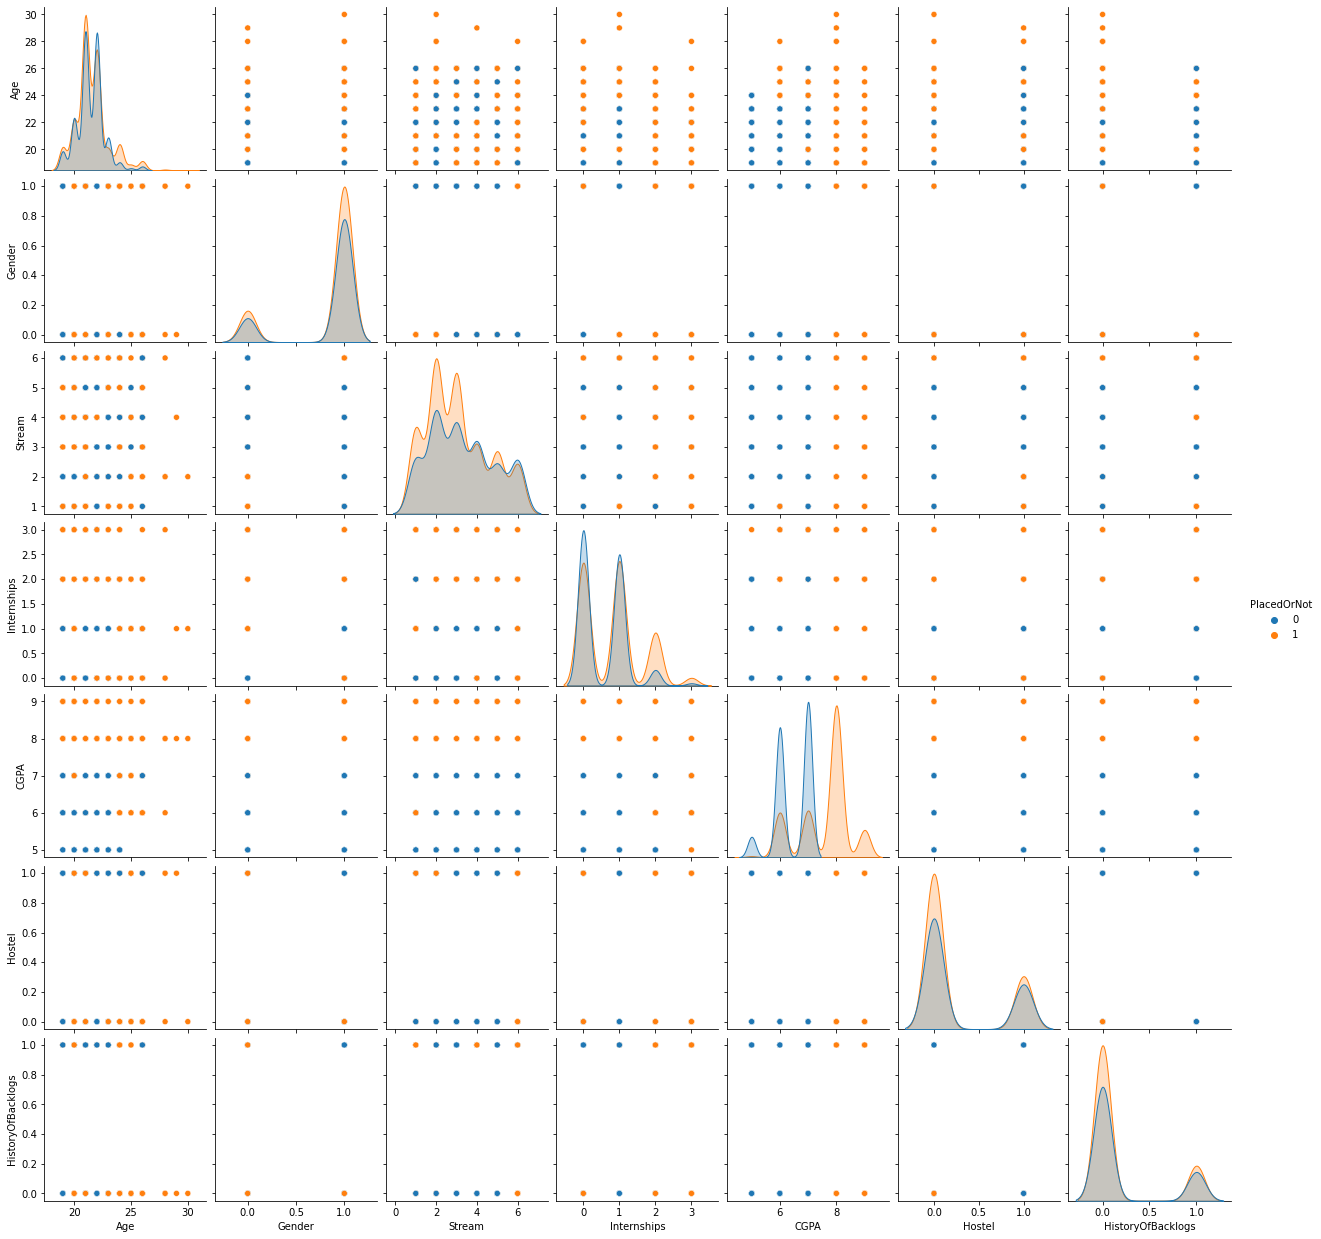

In [87]:
sns.pairplot(df,hue="PlacedOrNot")
plt.show()

### Correlation Matrix And HeatMap Between Each Feature Of Dataset

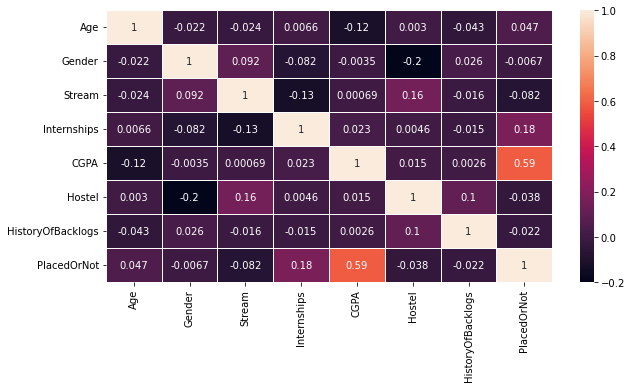

In [88]:
corr = df.corr()

plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True , linewidth = 0.5)
plt.show()

### Store Feature Matrix In X and Response(Target) In Vector y
### X = Independent Variables
### y = Dependent Variable

In [89]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [90]:
X = df.drop('PlacedOrNot', axis = 1)

In [91]:
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,1,1,8,1,1
1,21,0,2,0,7,1,1
2,22,0,3,1,6,0,0
3,21,1,3,0,8,0,1
4,22,1,4,0,8,1,0
...,...,...,...,...,...,...,...
2961,23,1,3,0,7,0,0
2962,23,1,4,1,7,1,0
2963,22,1,3,1,7,0,0
2964,22,1,2,1,7,0,0


In [92]:
y = df['PlacedOrNot']

In [93]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [94]:
X.shape

(2966, 7)

In [95]:
y.shape

(2966,)

### Splitting The Dataset Into The Training Set And Test Set 

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [97]:
X_train.shape 

(1987, 7)

In [98]:
X_test.shape

(979, 7)

In [99]:
y_train.shape  

(1987,)

In [100]:
y_test.shape

(979,)

### Training The Models

In [101]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svc = SVC()
svc.fit(X_train,y_train)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

### Prediction On Data

In [102]:
y_pred1 = lr.predict(X_test)
y_pred2 = svc.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

### Evaluating The Models

In [103]:
cm1 = confusion_matrix(y_test , y_pred1)
cm2 = confusion_matrix(y_test , y_pred2)
cm3 = confusion_matrix(y_test , y_pred3)
cm4 = confusion_matrix(y_test , y_pred4)
cm5 = confusion_matrix(y_test , y_pred5)
cm6 = confusion_matrix(y_test , y_pred6)

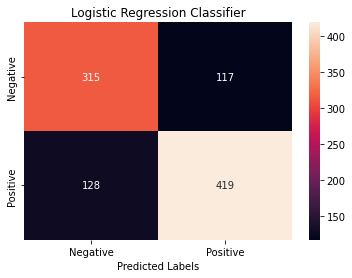

In [104]:
sns.heatmap(cm1 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Labels')
plt.title('Logistic Regression Classifier')
plt.show()

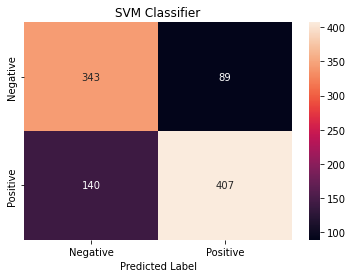

In [105]:
sns.heatmap(cm2 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('SVM Classifier')
plt.show()

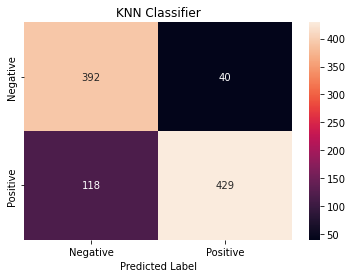

In [106]:
sns.heatmap(cm3 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('KNN Classifier')
plt.show()

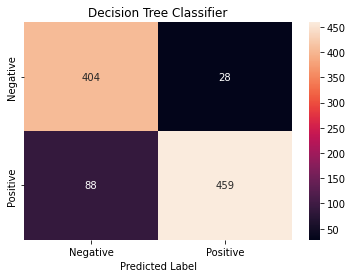

In [107]:
sns.heatmap(cm4 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('Decision Tree Classifier')
plt.show()

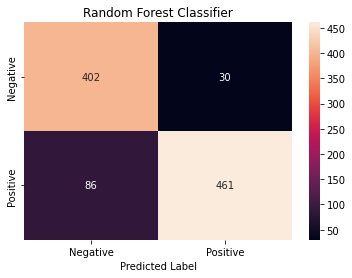

In [108]:
sns.heatmap(cm5 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('Random Forest Classifier')
plt.show()

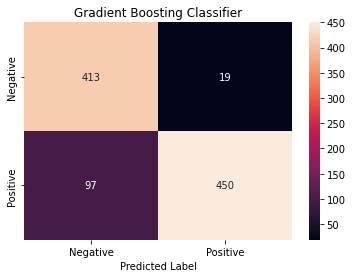

In [109]:
sns.heatmap(cm6 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('Gradient Boosting Classifier')
plt.show()

In [110]:
acc1 = accuracy_score(y_test,y_pred1)
acc2 = accuracy_score(y_test,y_pred2)
acc3 = accuracy_score(y_test,y_pred3)
acc4 = accuracy_score(y_test,y_pred4)
acc5 = accuracy_score(y_test,y_pred5)
acc6 = accuracy_score(y_test,y_pred6)

In [111]:
prec1 = precision_score(y_test,y_pred1)
prec2 = precision_score(y_test,y_pred2)
prec3 = precision_score(y_test,y_pred3)
prec4 = precision_score(y_test,y_pred4)
prec5 = precision_score(y_test,y_pred5)
prec6 = precision_score(y_test,y_pred6)

In [112]:
r1 = recall_score(y_test,y_pred1)
r2 = recall_score(y_test,y_pred2)
r3 = recall_score(y_test,y_pred3)
r4 = recall_score(y_test,y_pred4)
r5 = recall_score(y_test,y_pred5)
r6 = recall_score(y_test,y_pred6)

In [113]:
f1 = f1_score(y_test,y_pred1)
f2 = f1_score(y_test,y_pred2)
f3 = f1_score(y_test,y_pred3)
f4 = f1_score(y_test,y_pred4)
f5 = f1_score(y_test,y_pred5)
f6 = f1_score(y_test,y_pred6)

In [114]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'ACCURACY':[acc1*100,acc2*100,acc3*100,acc4*100,acc5*100,acc6*100],
            'PRECISION':[prec1*100,prec2*100,prec3*100,prec4*100,prec5*100,prec6*100],
            'RECALL' :[r1*100 , r2*100 , r3 * 100 , r4 * 100 , r5 * 100 , r6 * 100],
            'F1_SCORE':[f1*100 , f2*100 , f3 * 100 , f4 * 100 , f5 * 100 , f6 * 100]})

In [115]:
final_data

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
0,LR,74.974464,78.171642,76.599634,77.377655
1,SVC,76.608784,82.056452,74.405850,78.044104
2,KNN,83.861083,91.471215,78.427788,84.448819
3,DT,88.151175,94.250513,83.912249,88.781431
4,RF,88.151175,93.890020,84.277879,88.824663
5,GB,88.151175,95.948827,82.266910,88.582677


In [116]:
final_data[final_data['ACCURACY'] == final_data['ACCURACY'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
3,DT,88.151175,94.250513,83.912249,88.781431
4,RF,88.151175,93.890020,84.277879,88.824663
5,GB,88.151175,95.948827,82.266910,88.582677


In [117]:
final_data[final_data['PRECISION'] == final_data['PRECISION'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
5,GB,88.151175,95.948827,82.26691,88.582677


In [118]:
final_data[final_data['RECALL'] == final_data['RECALL'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
4,RF,88.151175,93.89002,84.277879,88.824663


In [119]:
final_data[final_data['F1_SCORE'] == final_data['F1_SCORE'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
4,RF,88.151175,93.89002,84.277879,88.824663


<AxesSubplot:xlabel='Models', ylabel='ACCURACY'>

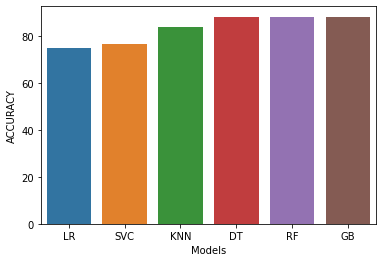

In [120]:
sns.barplot(final_data['Models'],final_data['ACCURACY'])

<AxesSubplot:xlabel='Models', ylabel='PRECISION'>

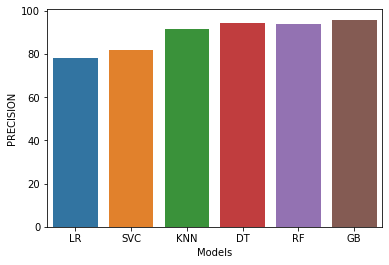

In [121]:
sns.barplot(final_data['Models'],final_data['PRECISION'])

<AxesSubplot:xlabel='Models', ylabel='RECALL'>

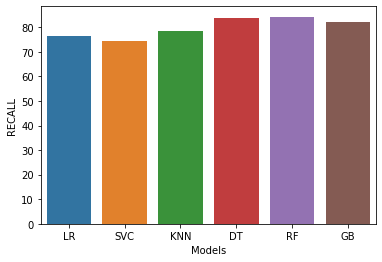

In [122]:
sns.barplot(final_data['Models'],final_data['RECALL'])

<AxesSubplot:xlabel='Models', ylabel='F1_SCORE'>

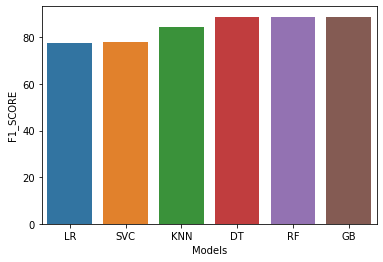

In [123]:
sns.barplot(final_data['Models'],final_data['F1_SCORE'])

#  Random Forest Model Is Selected For Prediction

### Training The Best Model On Whole Dataset

In [124]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### Prediction On New Data

In [125]:
new_data = pd.DataFrame({'Age' : 20,
                         'Gender' : 1,
                         'Stream' : 2,
                         'Internships' : 0,
                         'CGPA' : 9,
                         'Hostel' : 0,
                         'HistoryOfBacklogs' : 0},index = [0])
new_data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,20,1,2,0,9,0,0


In [126]:
p = rf.predict(new_data)
if p == 1:
    print('Placed')
else:
    print("Not-placed")

Placed


In [127]:
prob = rf.predict_proba(new_data)

prob

array([[0., 1.]])

In [128]:
print(f"You will be placed with probability of {prob[0][1]:.3f}")

You will be placed with probability of 1.000


### Save Model Using Pickle Library

In [129]:
pickle.dump(rf, open('model.pkl','wb'))

In [130]:
model = pickle.load(open('model.pkl','rb'))

In [131]:
model.predict(new_data)

array([1], dtype=int64)

In [132]:
if(model.predict(new_data) == 1):
    print('Placed')
else:
    print('Not Placed')

Placed


In [133]:
new_data = pd.DataFrame({'Age' : 22,
                         'Gender' : 1,
                         'Stream' : 2,
                         'Internships' : 0,
                         'CGPA' : 7,
                         'Hostel' : 0,
                         'HistoryOfBacklogs' : 0},index = [0])
new_data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,2,0,7,0,0


In [134]:
if(model.predict(new_data) == 1):
    print('Placed')
else:
    print('Not Placed')

Not Placed


In [135]:
prob = rf.predict_proba(new_data)

prob

array([[0.82434303, 0.17565697]])